# 1) Questões de Negócio
Nome da Empresa: House Rocket<br>
Modelo de Negócio: Compra e venda de imóveis, obtendo lucro pela revenda.<br>
Problemas de Negócio: 
1. Quais os imóveis que a House Rocket deveria comprar e por qual preço?
2. Uma vez comprados, quando será a melhor época para revender e por qual preço?
3. Valide as seguintes *hipóteses de negócio*:
   1. Imóveis que possuem vista para água, são 20% mais caros, na média.
   2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
   3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.
   4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
   5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
   6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.
   7. Imóveis antigos construidos antes de 1970, que nunca foram renovados, são 40% mais baratos em média.
   8. Imóveis que foram renovados recentemente são 19% mais caros, na mediana.
   9.  Imóveis em más condições mas possuem vista para o mar, são 10% mais caras, na mediana.
   10. O crescimento MoM (Month over Month) do preço das propriedades é de 1%, na média.

# 2) Planejamento da Solução
### Produto Final
- Dashboard disponível online 24/7, contendo:
  - 2 tabelas referentes a recomendações de imóveis e preços de compra e revenda.
  - Visualiações correspondendo a validação de cada uma das hipóteses de negócio.
### Planejamento das Ferramentas
- Python 3.10.*
- Pandas, Numpy
- Matplotlib e Seaborn
- Streamlit
- Cloud Heroku
### Processo
##### 1) Quais os imóveis que a House Rocket deveria comprar e por qual preço?
1. Agrupar os imóveis por região;
2. Aplicar mediana do preço de cada região;
3. Selecionar imóveis que estejam abaixo do preço mediano de sua região e que estejam em boas condições;
##### 2) Uma vez comprados, quando será a melhor época para revender e por qual preço?
1. Agrupar os imóveis por região e por sazionalidade (verão e inverno);
2. Calcular preço mediano de cada grupo;
3. Selecionar aqueles imóveis que estejam em boas condições e que possuam seu preço abaixo da mediana de seu grupo; 
##### 3) Valide as seguintes *hipóteses de negócio*:
1. Imóveis que possuem vista para água, são 20% mais caros, na média.
2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.
4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.
7. Imóveis antigos construidos antes de 1970, que nunca foram renovados, são 40% mais baratos em média.
8. Imóveis que foram renovados recentemente são 19% mais caros, na mediana.
9. Imóveis em más condições mas possuem vista para o mar, são 10% mais caras, na mediana.
10. O crescimento MoM (Month over Month) do preço das propriedades é de 1%, na média.

# 3) Coleta e Limpeza dos Dados

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()
pd.set_option('display.float_format', '{:.2f}'.format)

In [96]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [97]:
data.shape

(21613, 21)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [99]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Checando por linhas com todos os campos duplicados.

In [100]:
data.duplicated().sum()

0

Checando por valores nulos, mas como o observado no output do método 'info()', não há valores nulos por agora.

In [101]:
data.isna().any().sum()

0

Validando os tipos dos dados das variáveis,realizando castings apropriados.

In [102]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Precisaremos realizar algumas transformações na tipologia de algumas variáveis, nomeadamente:
- date: datetime
- condition: category
- waterfront: category

In [103]:
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [104]:
data['condition'] = data['condition'].astype('category')
data['condition'].unique()

[3, 5, 4, 1, 2]
Categories (5, int64): [1, 2, 3, 4, 5]

In [105]:
data['waterfront'] = data['waterfront'].astype('category')
data['waterfront'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [106]:
data['view'] = data['view'].astype('category')
data['view'].unique()

[0, 3, 4, 2, 1]
Categories (5, int64): [0, 1, 2, 3, 4]

In [107]:
data_numeric, data_category = data.select_dtypes(include=['int', 'float']), data.select_dtypes(exclude=['int', 'float'])

In [108]:
data_category.describe()

/tmp/ipykernel_3192/3387595875.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_category.describe()


,date,waterfront,view,condition
count,21613,21613.00,21613.00,21613.00
unique,372,2.00,5.00,5.00
top,2014-06-23 00:00:00,0.00,0.00,3.00
freq,142,21450.00,19489.00,14031.00
first,2014-05-02 00:00:00,NaN,NaN,NaN
last,2015-05-27 00:00:00,NaN,NaN,NaN


# 4) Análise Exploratória dos Dados

### Removendo outliers

In [109]:
def find_outlier_trashhold(quantile, col, data, factor=2):
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    trash_hold = iqr * factor
    if (quantile > 0.25):
        return data[col].quantile(0.75) + trash_hold
    else:
        return data[col].quantile(0.25) - trash_hold

In [110]:
def remove_outliers(data, cols):
    for col in cols:
        data = data.loc[(data[col] > find_outlier_trashhold(0.25, col, data)) & (data[col] < find_outlier_trashhold(0.75, col, data))]
    return data

In [111]:
data_shortened = data.copy()

In [112]:
# removendo outliers de todas as variáveis do dataset, generalizando como outliers valores acima ou abaixo de 2 vezes o valor do IQR de sua variável
data_shortened = remove_outliers(data_shortened, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors'])

In [113]:
data_shortened.shape

(18243, 21)

In [114]:
data = data_shortened

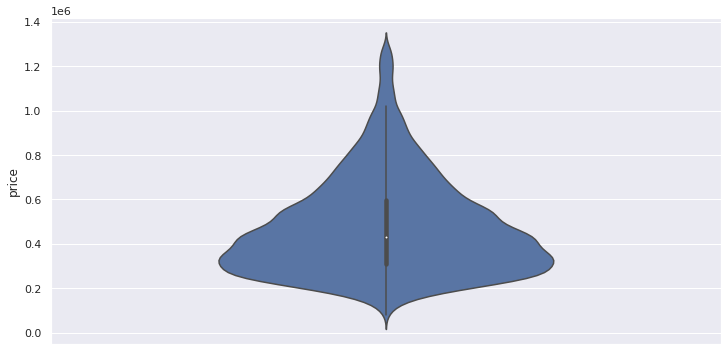

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(y=data['price'], width=.5)

plt.show()

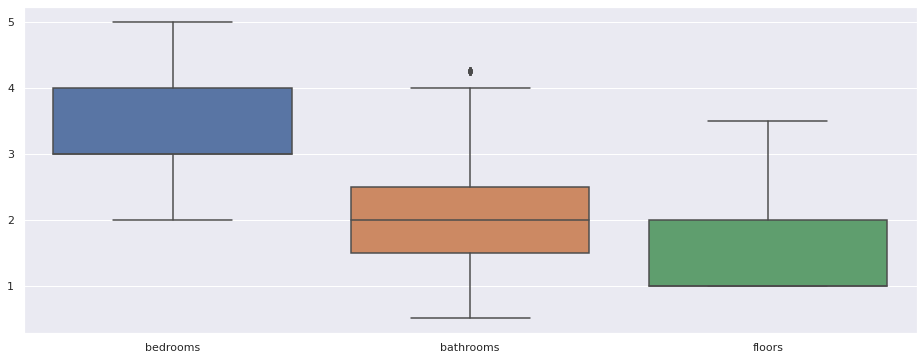

In [116]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(data=data[['bedrooms', 'bathrooms', 'floors']])

plt.show()

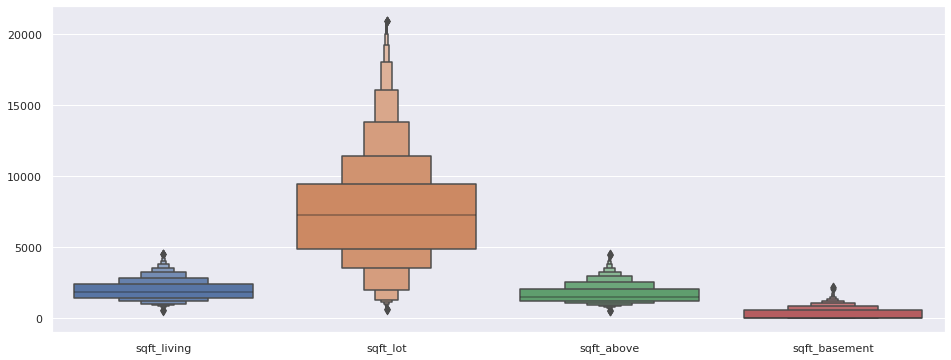

In [117]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxenplot(data=data[['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement']])

plt.show()

### Gerando **Relatório 1**: 
#### **1) Quais os imóveis que a House Rocket deveria comprar e por qual preço?**

In [118]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [119]:
df_rep1 = data.copy()
rel_cols = ['id', 'date', 'zipcode','price','Median Price', 'condition','status']
df_median_price = data.groupby('zipcode').agg({'price': 'median'})
df_median_price.head()

,price
zipcode,
98001,256000.00
98002,234000.00
98003,263750.00
98004,867500.00
98005,710000.00


In [120]:
# Método 1
df_rep1['Median Price'] = df_rep1['zipcode'].map(lambda x: df_median_price.loc[x].price)
df_rep1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Median Price
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,275000.00
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,422000.00
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,433000.00
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,485000.00
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,625000.00


In [121]:
df_median_price.rename(columns={'price': 'Median Price M2'}, inplace=True)

In [122]:
# Método 2
df_rep1 = df_rep1.merge(df_median_price, how='left', left_on='zipcode', right_index=True)
df_rep1.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Median Price,Median Price M2
18528,7116500925,2014-05-20,206000.00,4,2.00,1700,6025,1.00,0,0,...,0,1978,0,98002,47.30,-122.22,1320,5956,234000.00,234000.00
2231,8563000520,2014-10-29,529219.00,4,2.25,1990,7610,1.00,0,0,...,700,1966,0,98008,47.62,-122.10,1820,8198,535900.00,535900.00
15418,2420069242,2014-09-25,175000.00,2,1.00,740,3434,1.00,0,0,...,0,1920,0,98022,47.21,-121.99,1160,6000,251500.00,251500.00
19162,6705120100,2015-05-04,460000.00,3,2.25,1453,2225,2.00,0,0,...,0,1986,0,98006,47.54,-122.19,1860,2526,697450.00,697450.00
11553,4031700030,2015-04-10,299999.00,3,2.50,2380,9719,2.00,0,0,...,0,2001,0,98001,47.29,-122.28,2830,11505,256000.00,256000.00


Filtrando as casas que tenham o seu preço inferior ao da mediana de sua região e que ao mesmo tempo estejam em boas condições, e atribuindo a elas o valor de status 'Buy'. Significando que elas foram recomendadas para compra.

In [123]:
df_rep1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Median Price,Median Price M2
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,0,1955,0,98178,47.51,-122.26,1340,5650,275000.00,275000.00
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,400,1951,1991,98125,47.72,-122.32,1690,7639,422000.00,422000.00
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,0,1933,0,98028,47.74,-122.23,2720,8062,433000.00,433000.00
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,910,1965,0,98136,47.52,-122.39,1360,5000,485000.00,485000.00
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,0,1987,0,98074,47.62,-122.05,1800,7503,625000.00,625000.00


In [124]:
df_rep1['status'] = df_rep1.apply(lambda x: 'Buy' if (x['price'] < x['Median Price']) and (x['condition'] == 3) else 'Not Buy', axis=1)
print(df_rep1['status'].shape)
print(df_rep1['status'].unique())

(18243,)
['Buy' 'Not Buy']


In [125]:
df_rep1 = df_rep1.loc[df_rep1['status'] == 'Buy', rel_cols]
df_rep1.shape

(5809, 7)

In [126]:
# Relatório 1 Finalizado!
df_rep1.head(10)

,id,date,zipcode,price,Median Price,condition,status
0,7129300520,2014-10-13,98178,221900.00,275000.00,3,Buy
2,5631500400,2015-02-25,98028,180000.00,433000.00,3,Buy
4,1954400510,2015-02-18,98074,510000.00,625000.00,3,Buy
6,1321400060,2014-06-27,98003,257500.00,263750.00,3,Buy
8,2414600126,2015-04-15,98146,229500.00,295000.00,3,Buy
9,3793500160,2015-03-12,98038,323000.00,326992.00,3,Buy
16,1875500060,2014-07-31,98019,395000.00,402750.00,3,Buy
22,7137970340,2014-07-03,98092,285000.00,297300.00,3,Buy
23,8091400200,2014-05-16,98030,252700.00,280000.00,3,Buy
28,5101402488,2014-06-24,98115,438000.00,560750.00,3,Buy


### Gerando **Relatório 2**:
#### **2) Uma vez comprados, quando será a melhor época para revender e por qual preço?**

- Agrupar os dados por região(zipcode) e sazonalidade(primavera/verao/outono/inverno)
- Descobrir a mediana do preço de cada agrupamento
- Se o valor do imóvel for superior ao preço do seu agrupamento
  - Definir o preço de venda como: preço de compra + 10%
- Se não, se o valor do imóvel for inferior ao preço de seu agrupamento
  - Definir o preço de venda como: preço da compra + 30%

In [127]:
df_rep2 = df_rep1.copy()

In [128]:
def define_season_by_date(date):
    year = date.year
    winter1 = pd.date_range(start=f'{year-1}-12-01', end=f'{year}-02-28')
    spring = pd.date_range(start=f'{year}-03-01', end=f'{year}-05-31')
    summer = pd.date_range(start=f'{year}-06-01', end=f'{year}-08-31')
    fall = pd.date_range(start=f'{year}-09-01', end=f'{year}-11-30')
    winter2 = pd.date_range(start=f'{year}-12-01', end=f'{year+2}-02-28')
    if date in spring:
        return 'spring'
    elif date in summer:
        return 'summer'
    elif date in fall:
        return 'fall'
    elif (date in winter1) or (date in winter2):
        return 'winter'
    else:
        return np.NaN

In [129]:
df_rep2['season'] = df_rep2['date'].map(define_season_by_date)
df_rep2.head()

,id,date,zipcode,price,Median Price,condition,status,season
0,7129300520,2014-10-13,98178,221900.00,275000.00,3,Buy,fall
2,5631500400,2015-02-25,98028,180000.00,433000.00,3,Buy,winter
4,1954400510,2015-02-18,98074,510000.00,625000.00,3,Buy,winter
6,1321400060,2014-06-27,98003,257500.00,263750.00,3,Buy,summer
8,2414600126,2015-04-15,98146,229500.00,295000.00,3,Buy,spring


In [130]:
df_rep2['season'].unique()

array(['fall', 'winter', 'summer', 'spring'], dtype=object)

Uma vez a coluna season criada, agora podemos criar os agrupamentos indexados pela região e respectiva season.

In [131]:
median_price_rel2 = df_rep2.groupby(['zipcode', 'season']).agg({'price':'median'}).rename(columns={'price': 'Median Price'})
median_price_rel2.head(8)

Median Price
zipcode season              
98001   fall       211775.00
        spring     205000.00
        summer     214100.00
        winter     223000.00
98002   fall       187000.00
        spring     208000.00
        summer     222000.00
        winter     169450.00

In [132]:
df_rep2.drop(columns='Median Price', inplace=True, axis=1)
df_rep2.columns.values

array(['id', 'date', 'zipcode', 'price', 'condition', 'status', 'season'],
      dtype=object)

In [133]:
df_rep2 = df_rep2.merge(median_price_rel2, how='left', right_index=True, left_on=['zipcode', 'season'])
df_rep2.head()

,id,date,zipcode,price,condition,status,season,Median Price
0,7129300520,2014-10-13,98178,221900.00,3,Buy,fall,200000.00
2,5631500400,2015-02-25,98028,180000.00,3,Buy,winter,356500.00
4,1954400510,2015-02-18,98074,510000.00,3,Buy,winter,510000.00
6,1321400060,2014-06-27,98003,257500.00,3,Buy,summer,225000.00
8,2414600126,2015-04-15,98146,229500.00,3,Buy,spring,236950.00


In [134]:
df_rep2['Sell Price'] = df_rep2.apply(lambda x: x['price'] * 1.3 if x['price'] < x['Median Price'] else x['price'] * 1.1, axis=1)
df_rep2['Profit'] = df_rep2.apply(lambda x: (x['Sell Price'] - x['price']), axis=1)
df_rep2.head()

,id,date,zipcode,price,condition,status,season,Median Price,Sell Price,Profit
0,7129300520,2014-10-13,98178,221900.00,3,Buy,fall,200000.00,244090.00,22190.00
2,5631500400,2015-02-25,98028,180000.00,3,Buy,winter,356500.00,234000.00,54000.00
4,1954400510,2015-02-18,98074,510000.00,3,Buy,winter,510000.00,561000.00,51000.00
6,1321400060,2014-06-27,98003,257500.00,3,Buy,summer,225000.00,283250.00,25750.00
8,2414600126,2015-04-15,98146,229500.00,3,Buy,spring,236950.00,298350.00,68850.00


In [135]:
df_rep2 = df_rep2[['id', 'zipcode', 'season', 'Median Price', 'price', 'Sell Price', 'Profit']].rename(columns={'zipcode': 'Region', 'price':'Buy Price'})
df_rep2.head()

,id,Region,season,Median Price,Buy Price,Sell Price,Profit
0,7129300520,98178,fall,200000.00,221900.00,244090.00,22190.00
2,5631500400,98028,winter,356500.00,180000.00,234000.00,54000.00
4,1954400510,98074,winter,510000.00,510000.00,561000.00,51000.00
6,1321400060,98003,summer,225000.00,257500.00,283250.00,25750.00
8,2414600126,98146,spring,236950.00,229500.00,298350.00,68850.00


### Validação de Hipóteses de Negócio

#### 1. Imóveis que possuem vista para água, são 20% mais caros, na média.

In [136]:
mean_price = data.price.mean()
mean_price_waterfront = data.loc[data['waterfront'] == 1].price.mean()

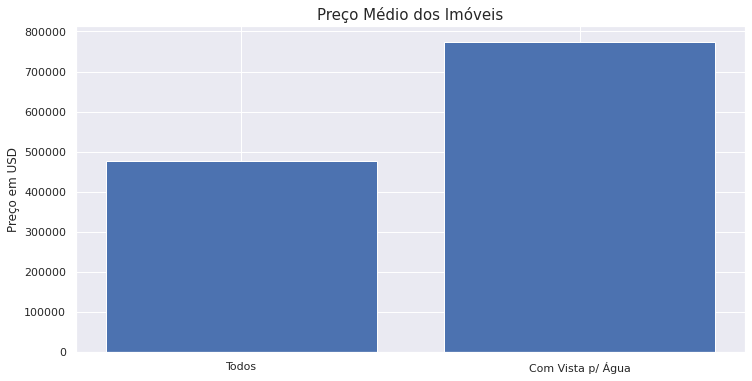

In [137]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x=['Todos', 'Com Vista p/ Água'], height=[mean_price, mean_price_waterfront])
ax.set_title('Preço Médio dos Imóveis', fontsize=15)
ax.set_ylabel('Preço em USD')

plt.show()

#### 2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

In [138]:
old_houses = data.loc[data['yr_built'] <= 1955].price.mean()
new_houses = data.loc[data['yr_built'] > 1955].price.mean()

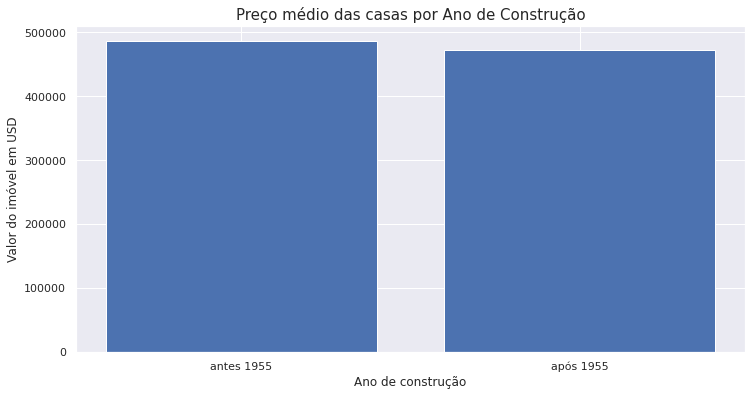

In [139]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x=['antes 1955', 'após 1955'], height=[old_houses, new_houses])
ax.set_title('Preço médio das casas por Ano de Construção', fontsize=15)
ax.set_ylabel('Valor do imóvel em USD')
ax.set_xlabel('Ano de construção')

plt.show()

#### 3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.

In [140]:
mean_area_basement = data.loc[data['sqft_basement'] != 0].sqft_lot.mean()
mean_area_without_basement = data[data['sqft_basement'] == 0].sqft_lot.mean()

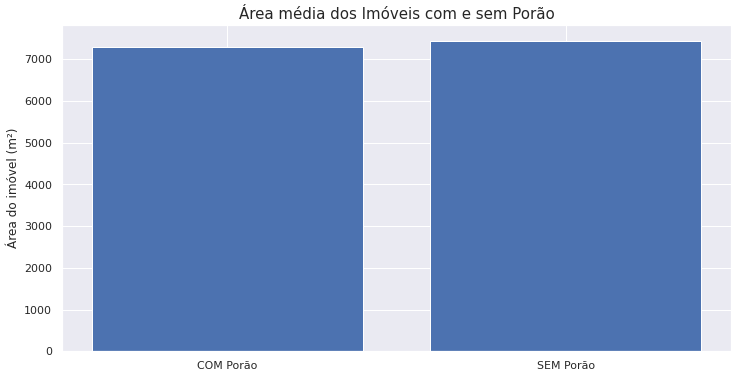

In [141]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x=['COM Porão', 'SEM Porão'], height=[mean_area_basement, mean_area_without_basement])
ax.set_title('Área média dos Imóveis com e sem Porão', fontsize=15)
ax.set_ylabel('Área do imóvel (m²)')

plt.show()

#### 4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.

In [142]:
data['year'] = data['date'].dt.year

In [143]:
yoy = data.groupby('year').agg({'price':'mean'})
yoy.head()

,price
year,
2014,476181.75
2015,475962.52


In [144]:
print(f"Nota-se uma variação YoY de {((yoy.loc[2015].price - yoy.loc[2014].price)/yoy.loc[2014].price)*100:.2f}% no preço.")

Nota-se uma variação YoY de -0.05% no preço.


#### 5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.

In [145]:
data['month'] = data['date'].dt.month

In [146]:
mom = data.loc[data['bathrooms'] == 3].groupby(['year', 'month']).agg({'price': 'mean'}).reset_index()
mom

,year,month,price
0,2014,5,599753.26
1,2014,6,613573.51
2,2014,7,621537.82
3,2014,8,608258.00
4,2014,9,602944.58
5,2014,10,578565.44
6,2014,11,588130.00
7,2014,12,582771.84
8,2015,1,601992.00
9,2015,2,527357.32


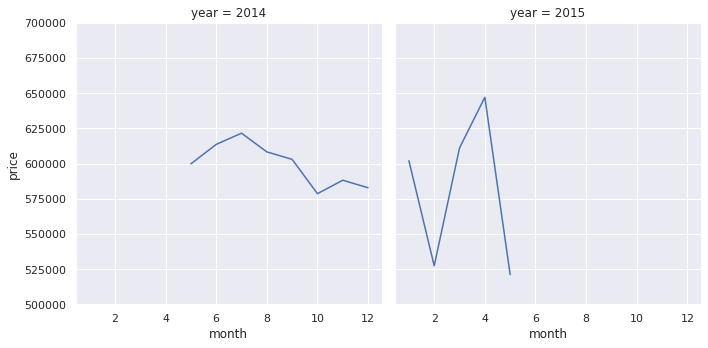

In [154]:
plt1 = sns.relplot(data=mom, x='month', y='price', col='year', kind='line')
plt1.set(ylim=(500000, 700000))

plt.show()

#### 6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.

In [157]:
data['bedrooms'].nunique()

4

In [160]:
sorted(data['bedrooms'].unique())

[2, 3, 4, 5]

In [ ]:
sns.barplot(x=, y=data['bedrooms'].unique())

#### 7. Imóveis antigos construidos antes de 1970, que nunca foram renovados, são 40% mais baratos em média.

#### 8. Imóveis que foram renovados recentemente são 19% mais caros, na mediana.

#### 9. Imóveis em más condições mas possuem vista para o mar, são 10% mais caras, na mediana.

#### 10. O crescimento MoM (Month over Month) do preço das propriedades é de 1%, na média.